In [63]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Loading the Data From Data Set
data = pd.read_csv('aug_test.csv')

In [27]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [28]:
null_counts=data.isnull().sum()
print(null_counts)

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64


In [29]:
# Handling missing Values
data.fillna({'gender ': 0, 'enrolled_university': 0, 'education_level ': 0, 'major_discipline': 0, 'experience': 0, 'company_size ': 0, 'company_type': 0, 'last_new_job': 0,}, inplace=True)

In [30]:
# changed gender intp binary
data['gender'] = LabelEncoder().fit_transform(data['gender'])

In [31]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,1,Has relevent experience,Full time course,Graduate,STEM,9,<10,0,1,21
1,9858,city_103,0.920,0,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,1,No relevent experience,no_enrollment,High School,0,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,1,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,1,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [32]:
data = pd.get_dummies(data, columns=['relevent_experience', 'education_level', 'enrolled_university'])

In [33]:
data.head()

,enrollee_id,city,city_development_index,gender,major_discipline,experience,company_size,company_type,last_new_job,training_hours,...,relevent_experience_No relevent experience,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,enrolled_university_0,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment
0,32403,city_41,0.827,1,STEM,9,<10,0,1,21,...,False,True,False,False,False,False,False,True,False,False
1,9858,city_103,0.920,0,STEM,5,NaN,Pvt Ltd,1,98,...,False,True,False,False,False,False,False,False,False,True
2,31806,city_21,0.624,1,0,<1,NaN,Pvt Ltd,never,15,...,True,False,True,False,False,False,False,False,False,True
3,27385,city_13,0.827,1,STEM,11,10/49,Pvt Ltd,1,39,...,False,False,False,True,False,False,False,False,False,True
4,27724,city_103,0.920,1,STEM,>20,10000+,Pvt Ltd,>4,72,...,False,True,False,False,False,False,False,False,False,True


In [34]:
data.dtypes

enrollee_id                                      int64
city                                            object
city_development_index                         float64
gender                                           int32
major_discipline                                object
experience                                      object
company_size                                    object
company_type                                    object
last_new_job                                    object
training_hours                                   int64
relevent_experience_Has relevent experience       bool
relevent_experience_No relevent experience        bool
education_level_Graduate                          bool
education_level_High School                       bool
education_level_Masters                           bool
education_level_Phd                               bool
education_level_Primary School                    bool
enrolled_university_0                             bool
enrolled_u

In [ ]:
# Columns to encode
categorical_columns = ['experience','company_size']

# Apply label encoding to each column
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str)) 

In [41]:
data.dtypes

enrollee_id                                      int64
city                                            object
city_development_index                         float64
gender                                           int32
major_discipline                                object
experience                                       int32
company_size                                     int32
company_type                                    object
last_new_job                                    object
training_hours                                 float64
relevent_experience_Has relevent experience       bool
relevent_experience_No relevent experience        bool
education_level_Graduate                          bool
education_level_High School                       bool
education_level_Masters                           bool
education_level_Phd                               bool
education_level_Primary School                    bool
enrolled_university_0                             bool
enrolled_u

In [42]:
# Define columns to scale
numeric_cols = ['experience', 'training_hours']

# Standardize numerical features
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

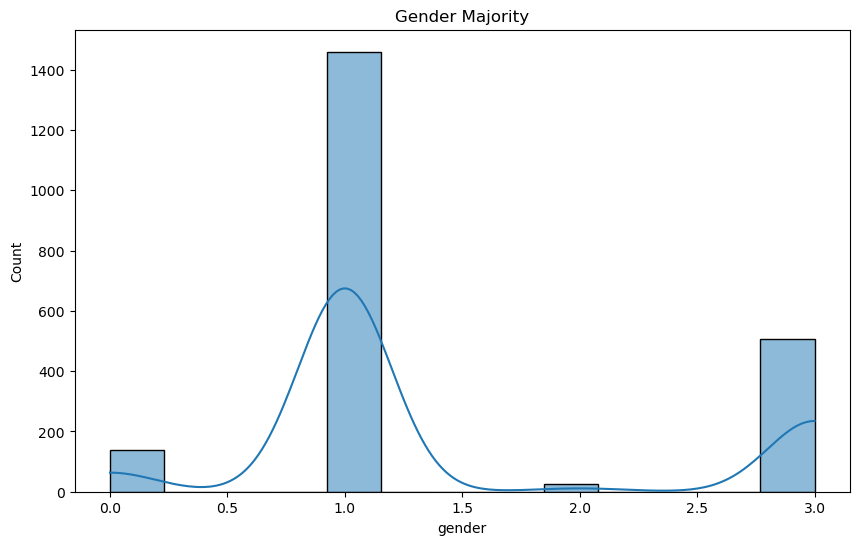

In [43]:
# Visualize salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['gender'], kde=True)
plt.title('Gender Majority')
plt.xlabel('gender')
plt.show()

In [50]:
# Columns to encode
categorical_columns = ['experience','company_size','major_discipline','company_type','last_new_job','city']

# Apply label encoding to each column
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str)) 

In [51]:
data.dtypes

enrollee_id                                      int64
city                                             int32
city_development_index                         float64
gender                                           int32
major_discipline                                 int32
experience                                       int32
company_size                                     int32
company_type                                     int32
last_new_job                                     int32
training_hours                                 float64
relevent_experience_Has relevent experience       bool
relevent_experience_No relevent experience        bool
education_level_Graduate                          bool
education_level_High School                       bool
education_level_Masters                           bool
education_level_Phd                               bool
education_level_Primary School                    bool
enrolled_university_0                             bool
enrolled_u

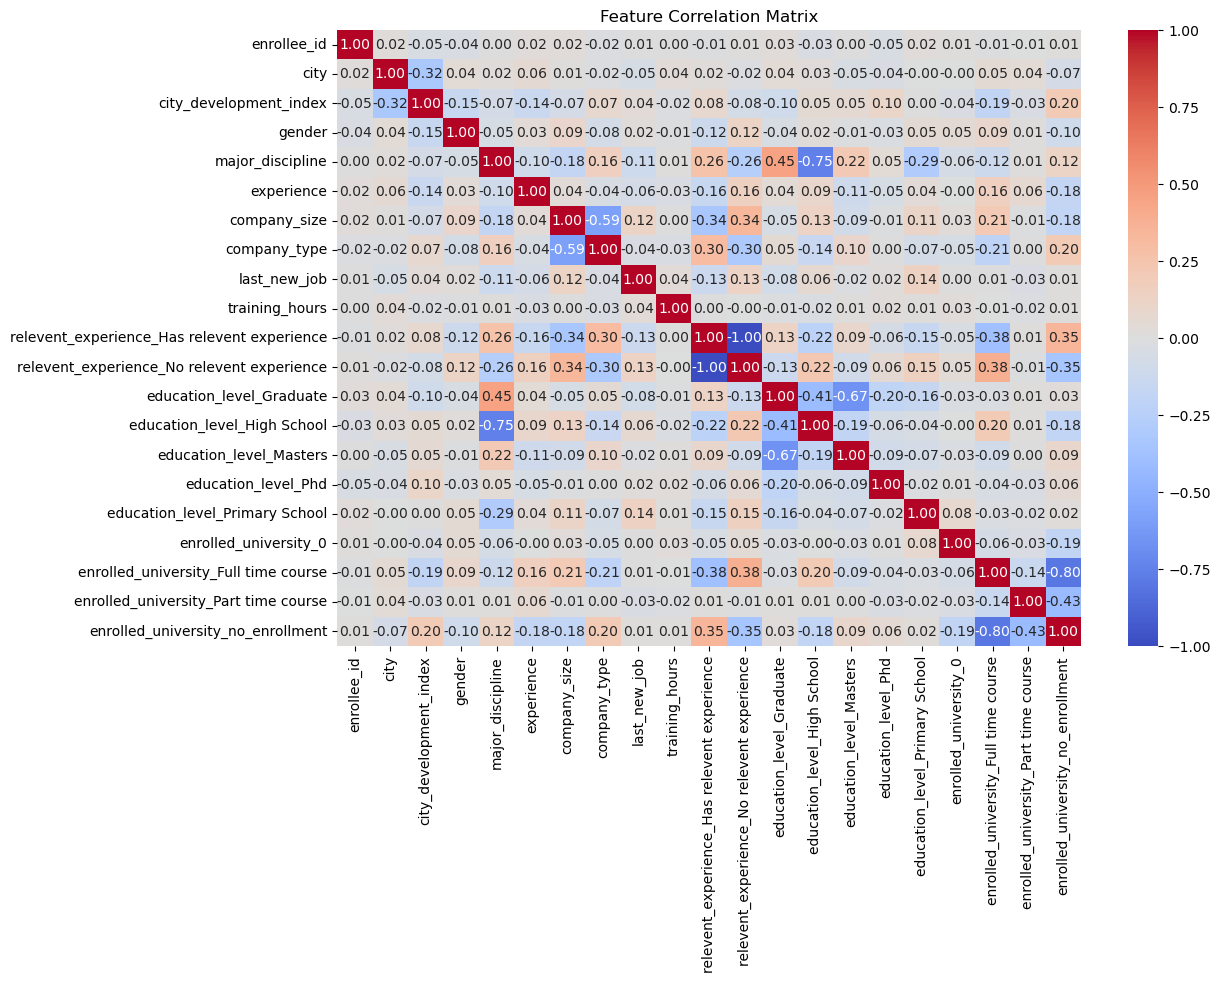

In [52]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()



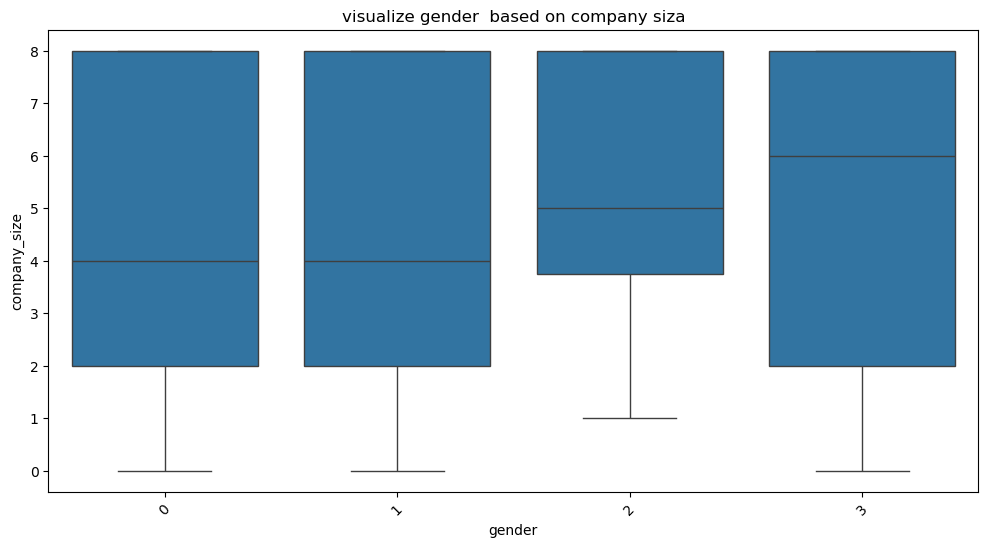

In [53]:
# Box plot to visualize gender  based on company siza
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='company_size', data=data)
plt.xticks(rotation=45)
plt.title('visualize gender  based on company siza')
plt.show()

In [55]:
X = data.drop(columns=['experience'])
y = data['experience']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [61]:
# Evaluate Linear Regression
y_pred_lin = lin_reg.predict(X_test)
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lin))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lin))
print("Linear Regression R^2:", r2_score(y_test, y_pred_lin))

Linear Regression MAE: 5.883015059779135
Linear Regression MSE: 46.53623407352778
Linear Regression R^2: 0.054217088722031126
